In [43]:
!pip install psycopg2

  Using cached psycopg2-2.9.7.tar.gz (383 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [23 lines of output]
      running egg_info
      creating /tmp/pip-pip-egg-info-5oqp92al/psycopg2.egg-info
      writing /tmp/pip-pip-egg-info-5oqp92al/psycopg2.egg-info/PKG-INFO
      writing dependency_links to /tmp/pip-pip-egg-info-5oqp92al/psycopg2.egg-info/dependency_links.txt
      writing top-level names to /tmp/pip-pip-egg-info-5oqp92al/psycopg2.egg-info/top_level.txt
      writing manifest file '/tmp/pip-pip-egg-info-5oqp92al/psycopg2.egg-info/SOURCES.txt'
      
      Error: pg_config executable not found.
      
      pg_config is required to build psycopg2 from source.  Please add the directory
      containing pg_config to the $PATH or specify the full executable path with the
      option:
      
          python setup.py build_ext --pg-config /path/to/pg_config build

In [44]:
!pip install pandas numpy matplotlib seaborn psycopg2-binary

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import psycopg2
import os

conn = psycopg2.connect(
    host="database_container1000",
    database=os.environ.get('POSTGRES_DB'),
    user=os.environ.get('POSTGRES_USER'),
    password=os.environ.get('POSTGRES_PASSWORD')
)

cursor = conn.cursor()
cursor.execute("SELECT * FROM new_offers")
rows = cursor.fetchall()
for row in rows:
    print(row)

query = "SELECT * FROM new_offers"
df = pd.read_sql_query(query, conn)

(1, 'https://nofluffjobs.com/job/python-devops-developer-sigma-it-poland-remote-1', 'Python DevOps Developer', 'Sigma IT Poland', '<None>', 'Remote', '17\xa0600  – 25\xa0600', '+ VAT (B2B) per month', "You might be the perfect match if you are/have:, Bachelor's degree in Computer Science, Engineering, or a related field (or equivalent, experience)., Minimum of 5 years of professional experience in Python development, ., Strong proficiency in Python, and its core libraries., In-depth knowledge of AWS services, , including but not limited to EC2, S3, Lambda, API, Gateway, Athena, Step functions, DynamoDB, RDS, ECS/EKS, CloudFormation, and, CloudWatch., Experience with web frameworks such as Flask, FastAPI, Streamlit or Shiny., Experience with relational databases like MySQL, PostgreSQL., Experience with, infrastructure-as-code, tools like AWS CloudFormation, CDK., Experience with big data analytics engines like Apache Spark, Presto, Trino., Solid understanding of software engineering pri

/tmp/ipykernel_898/1972631188.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [46]:
df.head()

,id,offer_link,offer_name,company,main_location,other_location,salary,salary_type,main_requirements_description,main_offer_description,...,benefits,company_info_founded_in,company_info_company_size,company_info_main_location,date_of_scrapping,when_published_relatively,categories,skills_maturity,tags_mandatory,tags_nice_to_have
0,1,https://nofluffjobs.com/job/python-devops-deve...,Python DevOps Developer,Sigma IT Poland,<None>,Remote,17 600 – 25 600,+ VAT (B2B) per month,You might be the perfect match if you are/have...,"We are looking for a Python DevOps Developer, ...",...,"Sport subscription, Training budget, Private h...",2017,150+,Wroclaw,2023-09-27,today,"DevOps, Python",Senior,"Python, AWS, Flask, MySQL, PostgreSQL, Docker,...","pandas, Jenkins, polars"
1,2,https://nofluffjobs.com/job/python-developer-o...,Python Developer,Objectivity - part of Accenture,"Wrocław, Gdańsk",Remote,15 960 – 26 040,+ VAT (B2B) per month,"Must-have skills & experience:, Strong backgro...","As a, Python Developer, , you will dive into t...",...,"‘Great Place to Work’ Certificate, Contract fo...",1991,700+,<None>,2023-09-27,1 day ago,"Backend, Python",Senior,"Python, Communication skills, Problem solving,...",<None>
2,3,https://nofluffjobs.com/job/python-developer-o...,Python Developer,Objectivity - part of Accenture,"Wrocław, Gdańsk",Remote,15 960 – 26 040,+ VAT (B2B) per month,"Must-have skills & experience:, Strong backgro...","As a, Python Developer, , you will dive into t...",...,"‘Great Place to Work’ Certificate, Contract fo...",1991,700+,<None>,2023-09-27,1 day ago,"Backend, Python",Senior,"Python, Communication skills, Problem solving,...",<None>
3,4,https://nofluffjobs.com/job/python-developer-o...,Python Developer,Objectivity - part of Accenture,"Wrocław, Gdańsk",Remote,15 960 – 26 040,+ VAT (B2B) per month,"Must-have skills & experience:, Strong backgro...","As a, Python Developer, , you will dive into t...",...,"‘Great Place to Work’ Certificate, Contract fo...",1991,700+,<None>,2023-09-27,1 day ago,"Backend, Python",Senior,"Python, Communication skills, Problem solving,...",<None>
4,5,https://nofluffjobs.com/job/python-developer-o...,Python Developer,Objectivity - part of Accenture,"Wrocław, Gdańsk",Remote,15 960 – 26 040,+ VAT (B2B) per month,"Must-have skills & experience:, Strong backgro...","As a, Python Developer, , you will dive into t...",...,"‘Great Place to Work’ Certificate, Contract fo...",1991,700+,<None>,2023-09-27,1 day ago,"Backend, Python",Senior,"Python, Communication skills, Problem solving,...",<None>


In [47]:
import matplotlib.pyplot as plt

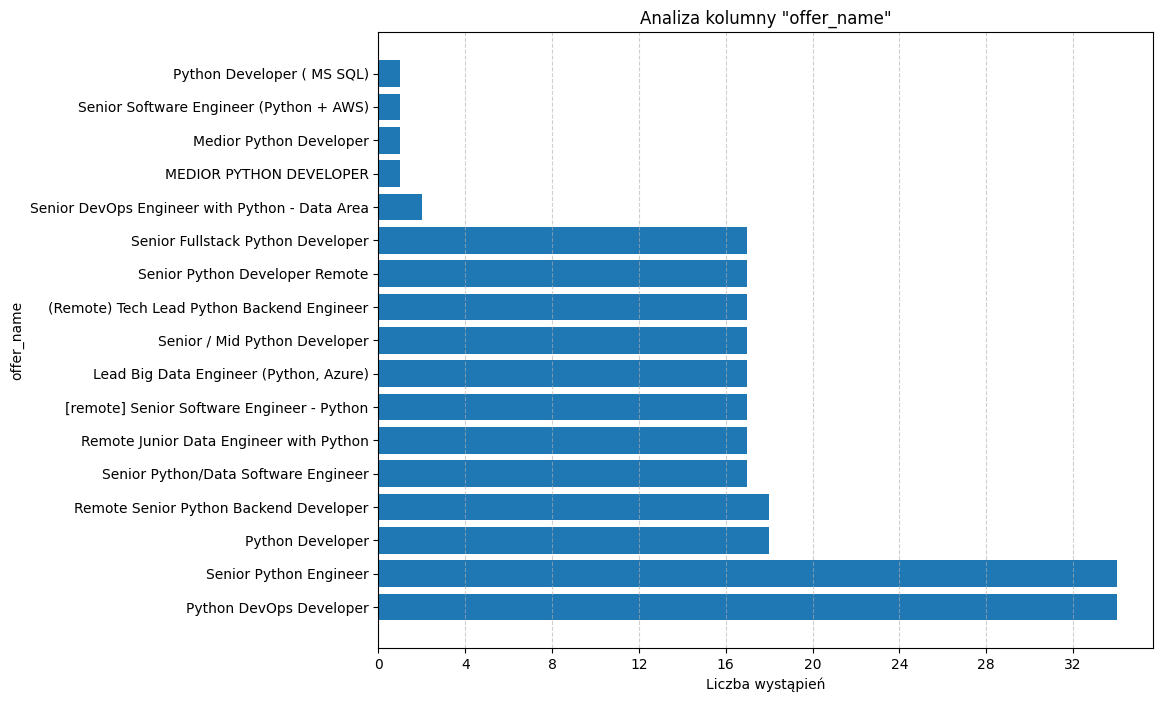

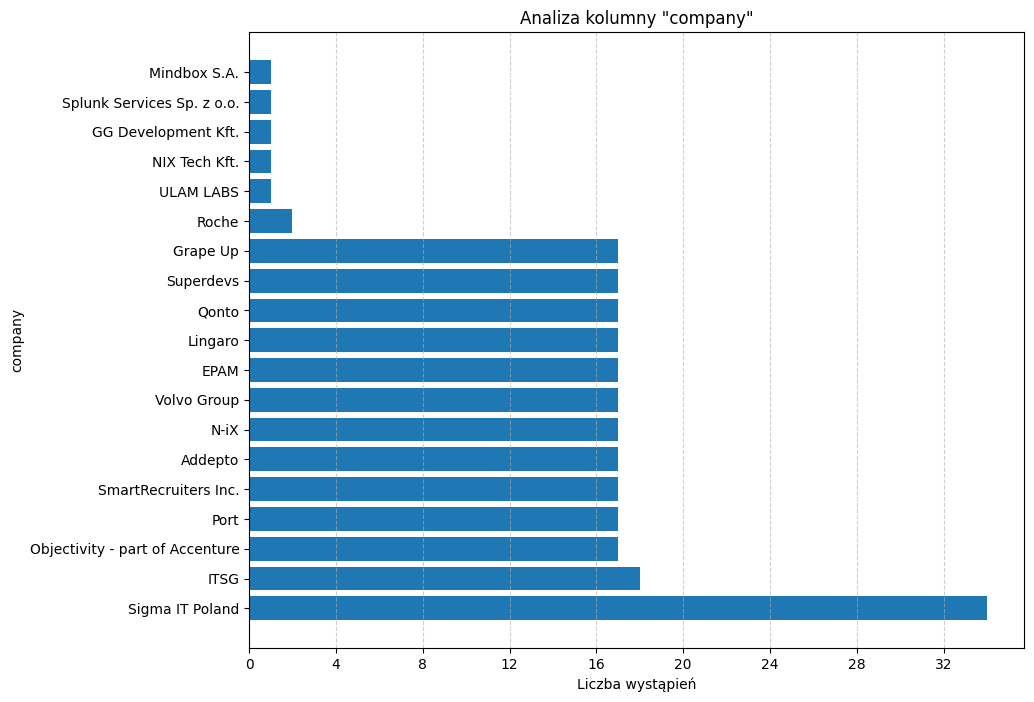

In [48]:
from matplotlib.ticker import MaxNLocator

def analyze_column(dataframe, column_name):
    # Sprawdź, czy kolumna istnieje w ramce danych
    if column_name not in dataframe.columns:
        print(f'Kolumna "{column_name}" nie istnieje w ramce danych.')
        return

    # Zliczanie wystąpień unikatowych wartości
    value_counts = dataframe[column_name].value_counts()
    
   # Tworzenie wizualizacji
    plt.figure(figsize=(10, 8))  # Ustawienie rozmiaru wykresu
    ax = plt.gca()  # Pobranie obecnej osi (get current axis)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # Ustawienie lokalizatora głównych znaczników osi X, aby używał tylko liczb całkowitych
    plt.barh(value_counts.index, value_counts.values)  # Użycie barh dla poziomego wykresu słupkowego
    plt.ylabel(column_name)
    plt.xlabel('Liczba wystąpień')
    plt.title(f'Analiza kolumny "{column_name}"')
    plt.grid(axis='x', linestyle='--', alpha=0.6)  # Zmiana osi siatki na 'x'
    plt.show()


# Wywołanie funkcji
analyze_column(df, 'offer_name')

analyze_column(df, 'company')


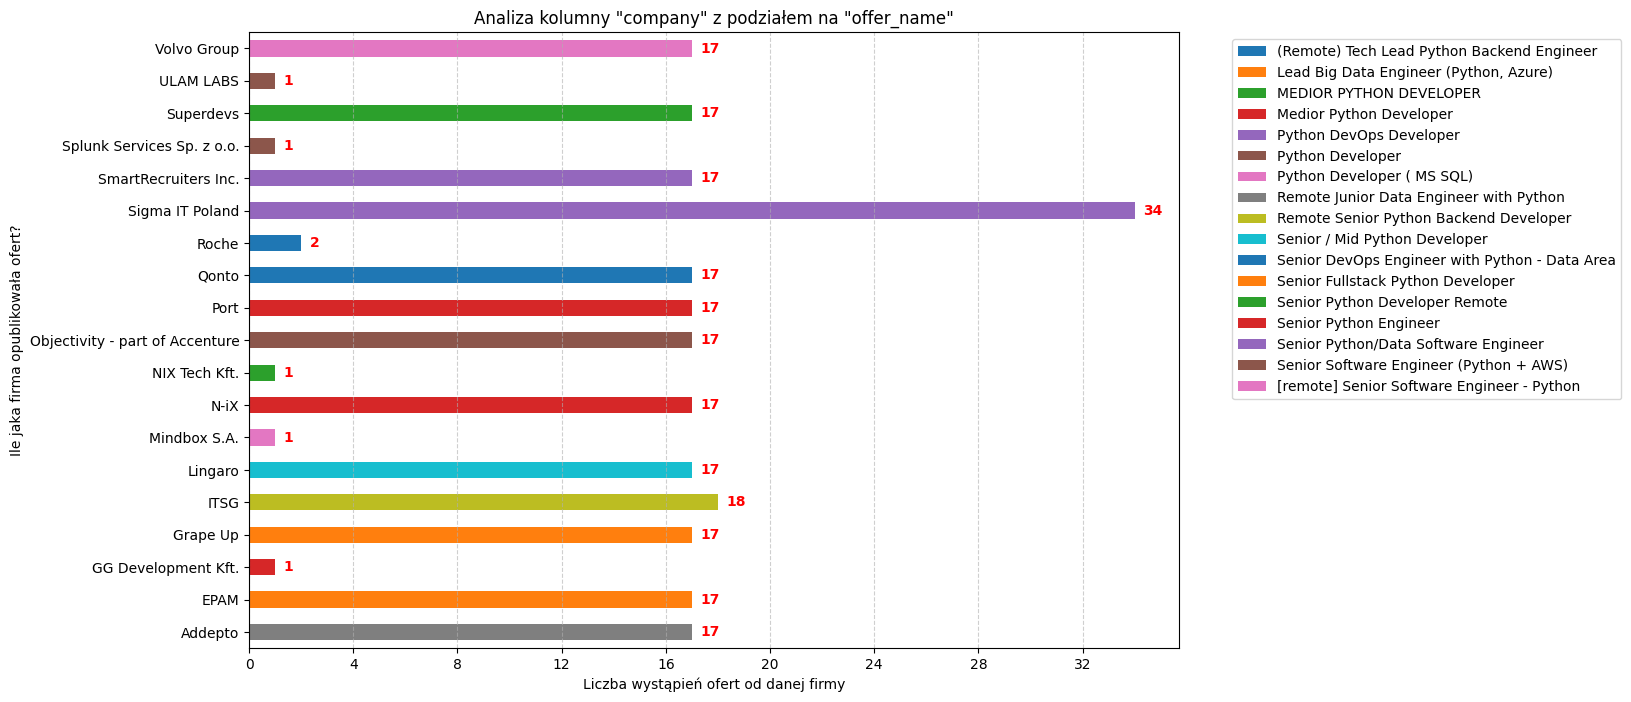

In [49]:
from matplotlib.ticker import MaxNLocator

def analyze_column_company_with_offer_names(dataframe, column_name="company", offer_column_name="offer_name"):
    # Sprawdź, czy kolumna istnieje w ramce danych
    if column_name not in dataframe.columns:
        print(f'Kolumna "{column_name}" nie istnieje w ramce danych.')
        return

    # Sprawdź, czy kolumna z nazwami ofert istnieje w ramce danych
    if offer_column_name not in dataframe.columns:
        print(f'Kolumna "{offer_column_name}" nie istnieje w ramce danych.')
        return

    # Grupowanie danych według kolumny i kolumny z nazwami ofert, a następnie zliczanie wielkości każdej grupy
    grouped_data = dataframe.groupby([column_name, offer_column_name]).size().unstack(fill_value=0)

    # Obliczenie łącznej liczby ofert dla każdej firmy
    total_offers = grouped_data.sum(axis=1)

    # Tworzenie wizualizacji
    plt.figure(figsize=(12, 8))  # Ustawienie rozmiaru wykresu
    ax = plt.gca()  # Pobranie obecnej osi (get current axis)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # Ustawienie lokalizatora głównych znaczników osi X, aby używał tylko liczb całkowitych

    # Rysowanie poziomego wykresu słupkowego z podgrupami
    grouped_data.plot(kind='barh', stacked=True, ax=ax)
    
    # Dodanie łącznej liczby ofert jako tekst na wykresie
    for i, total in enumerate(total_offers):
        plt.text(total + grouped_data.max().max() * 0.01, i, str(total), va='center', color='red', fontweight='bold', fontsize=10)
    
    plt.ylabel('Ile jaka firma opublikowała ofert?')
    plt.xlabel('Liczba wystąpień ofert od danej firmy')
    plt.title(f'Analiza kolumny "{column_name}" z podziałem na "{offer_column_name}"')
    plt.grid(axis='x', linestyle='--', alpha=0.6)  # Zmiana osi siatki na 'x'

    # Przeniesienie legendy poza obszar wykresu
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()


analyze_column_company_with_offer_names(df, 'company', 'offer_name')


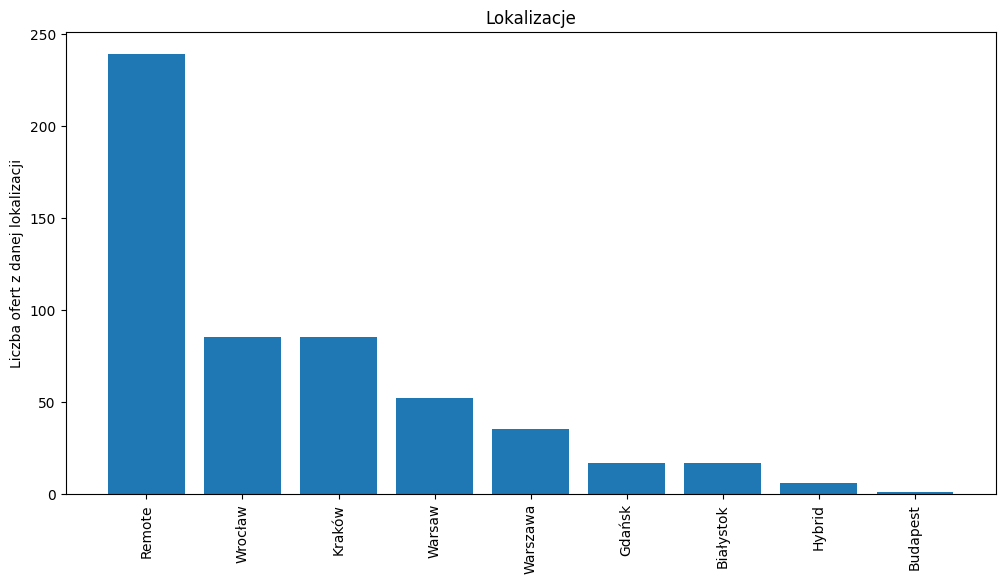

In [50]:
from collections import Counter

def location_joining(df):
    def join_locations(row):
        if row['main_location'] == '<None>' and row['other_location'] == '<None>':
            return '<none>'
        elif row['main_location'] == '<None>':
            return row['other_location']
        elif row['other_location'] == '<None>':
            return row['main_location']
        else:
            return f"{row['main_location']}, {row['other_location']}"

    df['location'] = df.apply(join_locations, axis=1)

    counter = Counter()
    
    for loc in df['location']:
        for sub_loc in loc.split(", "):
            if not any(char.isdigit() for char in sub_loc):
                counter[sub_loc] += 1

# Sortuj dane w malejącej kolejności
    sorted_data = dict(sorted(counter.items(), key=lambda x: x[1], reverse=True))
    
    # Tworzenie wykresu
    plt.figure(figsize=(12, 6))
    plt.bar(sorted_data.keys(), sorted_data.values())
    plt.xticks(rotation=90)
    plt.ylabel('Liczba ofert z danej lokalizacji')
    plt.title('Lokalizacje')
    plt.show()

# Możesz teraz użyć funkcji location_joining, przekazując jej df jako argument
# df = location_joining(df)

location_joining(df)


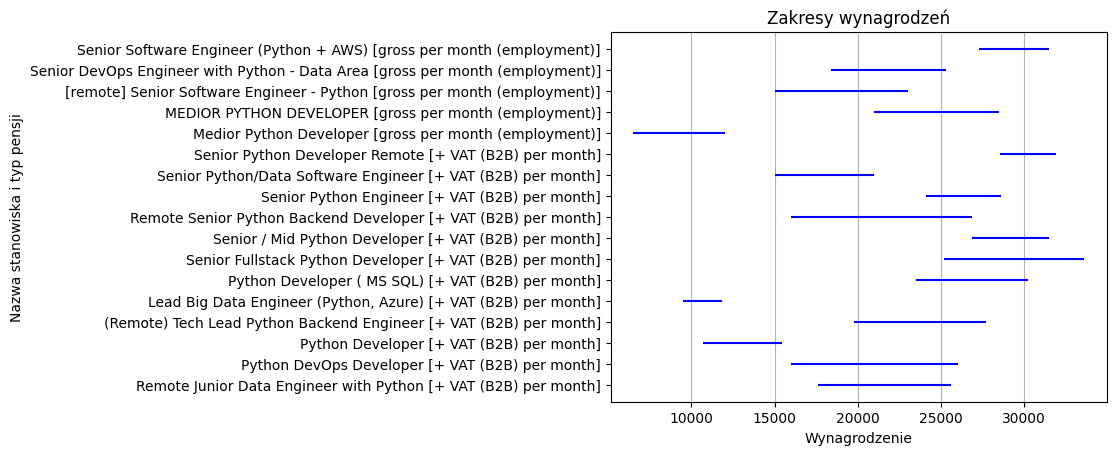

In [51]:
import re
import matplotlib.pyplot as plt

def average_salary(df):
    sum_variables_lower = {}
    sum_variables_upper = {}
    number_in_variables_type = {}

    for index, row in df.iterrows():
        # Usuwanie niecyfrowych znaków i podział wartości salary
        salary_values = row['salary'].split("–")
        salary_range = [re.sub(r'\D', '', x) for x in salary_values]

        # Tworzenie nazw zmiennych
        var_name = f"{row['offer_name']} [{row['salary_type']}]"
        lower_var_name = f"dolne_widelki_{row['offer_name']} [{row['salary_type']}]"
        upper_var_name = f"gorne_widelki_{row['offer_name']} [{row['salary_type']}]"
        no_range_var_name = f"srednia_bez_widelek_{row['offer_name']} [{row['salary_type']}]"

        if len(salary_range) > 1:
            # Sumowanie wartości do odpowiednich zmiennych (jeśli mamy widełki płacowe), oraz liczymy liczbę wystąpień danego typu wynagrodzeń
            sum_variables_lower[var_name] = sum_variables_lower.get(lower_var_name, 0) + int(salary_range[0])
            number_in_variables_type[var_name] = number_in_variables_type.get(lower_var_name, 0) + 1

            sum_variables_upper[var_name] = sum_variables_upper.get(upper_var_name, 0) + int(salary_range[1])            
        else:
            # Dodawanie wartości do zmiennej dla ofert bez widełek płacowych
            sum_variables_lower[no_range_var_name] = sum_variables.get(no_range_var_name, 0) + int(salary_range[0])
            number_in_variables_type[no_range_var_name] = number_in_variables_type.get(no_range_var_name, 0) + 1

    # Wyliczanie średniej wartości parametrów, na bazie dwóch słowników
    def divide_dict_values(dict_X, dict_Y):
        """
        Dzieli wartości słownika dict_X przez wartości słownika dict_Y 
        dla każdego klucza i zwraca nowy słownik z wynikami.

        :param dict_X: Słownik z dzielnikami
        :param dict_Y: Słownik z dzielnymi
        :return: Słownik z wynikami dzielenia
        """
        if set(dict_X.keys()) != set(dict_Y.keys()):
            raise ValueError("Słowniki mają różne zbiory kluczy")

        result_dict = {}
        for key in dict_X.keys():
            if dict_Y[key] == 0:
                raise ValueError(f"Wartość dla klucza '{key}' w słowniku dict_Y jest równa zero, dzielenie niemożliwe")
            result_dict[key] = dict_X[key] / dict_Y[key]

        return result_dict

    average_values_lower = divide_dict_values(sum_variables_lower, number_in_variables_type)
    average_values_upper = divide_dict_values(sum_variables_upper, number_in_variables_type)

    # Tworzenie wykresu
    preKeys = list(average_values_lower.keys())
    values_lower = list(average_values_lower.values())
    values_upper = list(average_values_upper.values())

    keys = sorted(preKeys, key=lambda x: x[::-1], reverse=True)

    def sorting_key(key):
        # Określ pozycję klucza na wykresie w oparciu o wyrażenia
        if "[+ VAT (B2B) per month]" in key:
            position1 = 0
        elif "[gross per month (employment)]" in key:
            position1 = 1
        else:
            position1 = 2
    
        # Określ pozycję klucza w oparciu o słowa "Junior", "Senior" itp.
        if "Junior" in key:
            position2 = 0
        elif "Senior" in key:
            position2 = 2
        else:
            position2 = 1
    
        return (position1, position2)

    # Posortuj klucze słownika keys używając zdefiniowanej funkcji klucza
    sorted_keys = sorted(keys, key=sorting_key)
    
    # Posortuj klucze słownika keys używając zdefiniowanej funkcji klucza
    keys = sorted(keys, key=sorting_key)
        
    i = 0
    while i < len(keys):
        if "srednia_bez_widelek" in keys[i]:
            #label = keys[i].replace("srednia_bez_widelek_", "")
            label = keys[i]
            plt.hlines(label, values_lower[i] - 90, values_lower[i] + 90, colors='red', linestyles='solid')
            i += 1
        else:
            label = keys[i]
            plt.hlines(label, values_lower[i], values_upper[i], colors='blue', linestyles='solid')
            i += 1

    plt.xlabel('Wynagrodzenie')
    plt.ylabel('Nazwa stanowiska i typ pensji')
    plt.title('Zakresy wynagrodzeń')
    plt.grid(axis='x')
    plt.show()

# Test funkcji
average_salary(df)


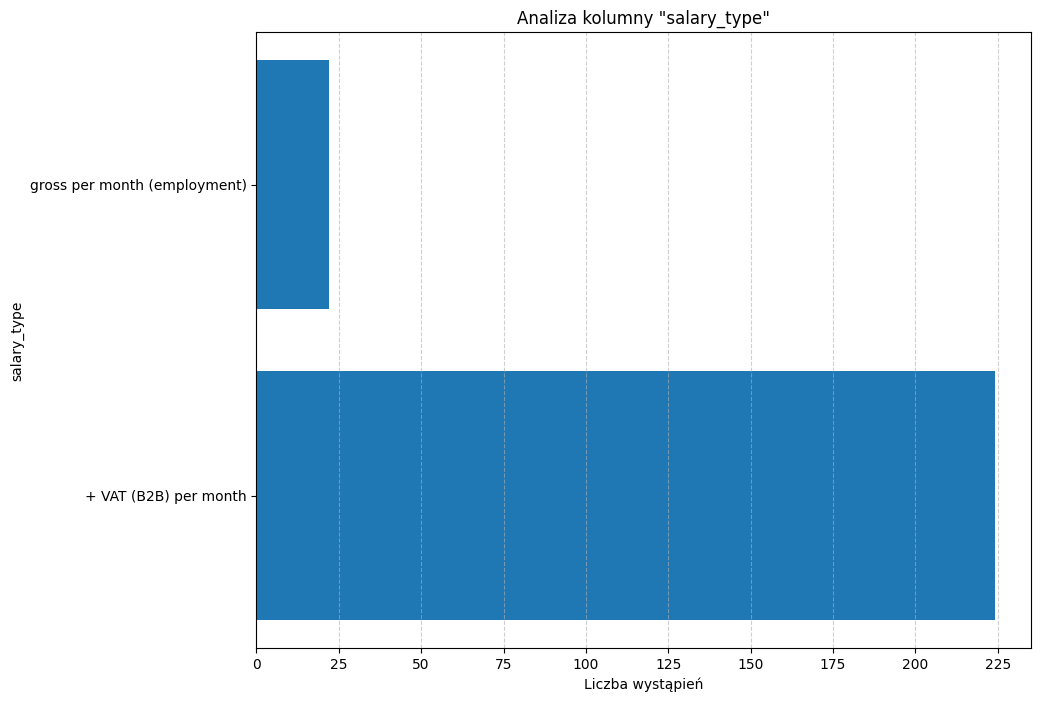

In [52]:
analyze_column(df, 'salary_type')

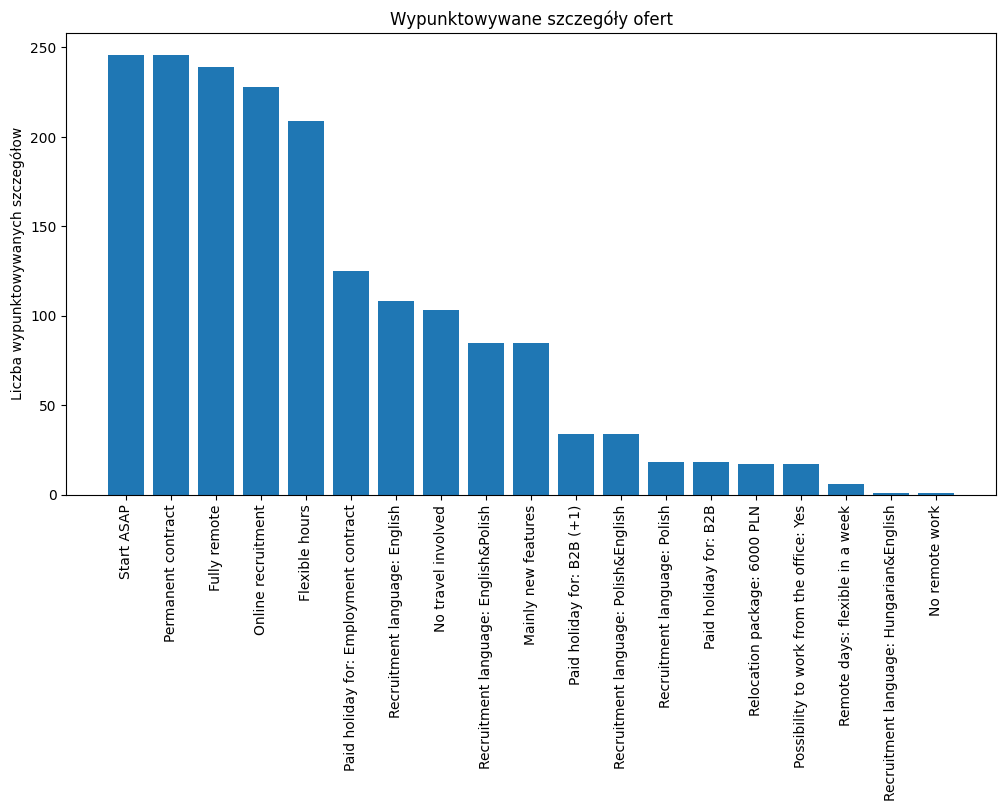

In [53]:
    def offer_details_counter(df):
        counter = Counter()
        
        for loc in df['offer_details']:
            for sub_loc in loc.split(", "):
                counter[sub_loc] += 1

        # Sortuj dane w malejącej kolejności
        sorted_data = dict(sorted(counter.items(), key=lambda x: x[1], reverse=True))
        
        # Tworzenie wykresu
        plt.figure(figsize=(12, 6))
        plt.bar(sorted_data.keys(), sorted_data.values())
        plt.xticks(rotation=90)
        plt.ylabel('Liczba wypunktowywanych szczegółow')
        plt.title('Wypunktowywane szczegóły ofert')
        plt.show()

# Możesz teraz użyć funkcji location_joining, przekazując jej df jako argument
# df = location_joining(df)

offer_details_counter(df)

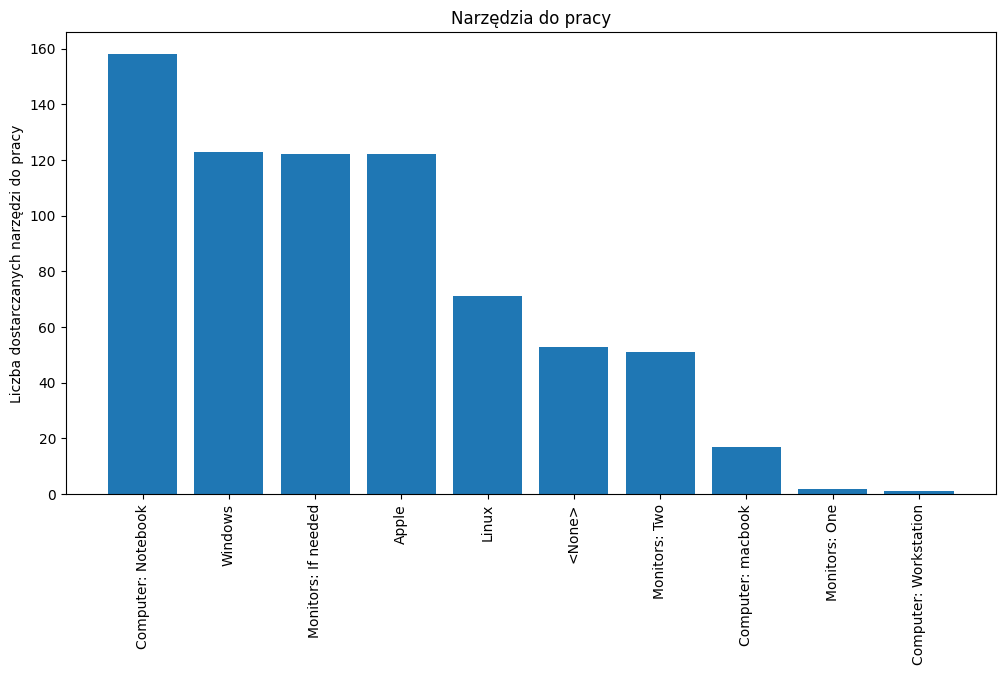

In [54]:
    def eq_supplied_counter(df):
        counter = Counter()
        
        for loc in df['equipment_supplied']:
            for sub_loc in loc.split(", "):
                counter[sub_loc] += 1

        # Sortuj dane w malejącej kolejności
        sorted_data = dict(sorted(counter.items(), key=lambda x: x[1], reverse=True))
        
        # Tworzenie wykresu
        plt.figure(figsize=(12, 6))
        plt.bar(sorted_data.keys(), sorted_data.values())
        plt.xticks(rotation=90)
        plt.ylabel('Liczba dostarczanych narzędzi do pracy')
        plt.title('Narzędzia do pracy')
        plt.show()

# Możesz teraz użyć funkcji location_joining, przekazując jej df jako argument
# df = location_joining(df)

eq_supplied_counter(df)

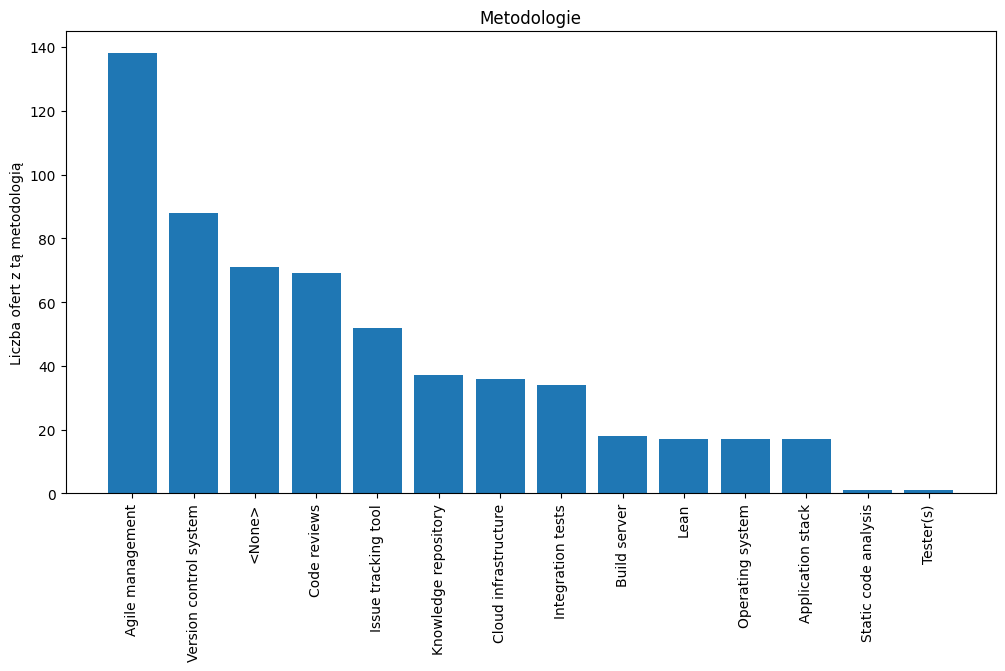

In [55]:


    def methodology_ctr(df):
        counter = Counter()
        
        for loc in df['methodology']:
            for sub_loc in loc.split(", "):
                counter[sub_loc] += 1

        # Sortuj dane w malejącej kolejności
        sorted_data = dict(sorted(counter.items(), key=lambda x: x[1], reverse=True))
        
        # Tworzenie wykresu
        plt.figure(figsize=(12, 6))
        plt.bar(sorted_data.keys(), sorted_data.values())
        plt.xticks(rotation=90)
        plt.ylabel('Liczba ofert z tą metodologią')
        plt.title('Metodologie')
        plt.show()

# Możesz teraz użyć funkcji location_joining, przekazując jej df jako argument
# df = location_joining(df)

methodology_ctr(df)

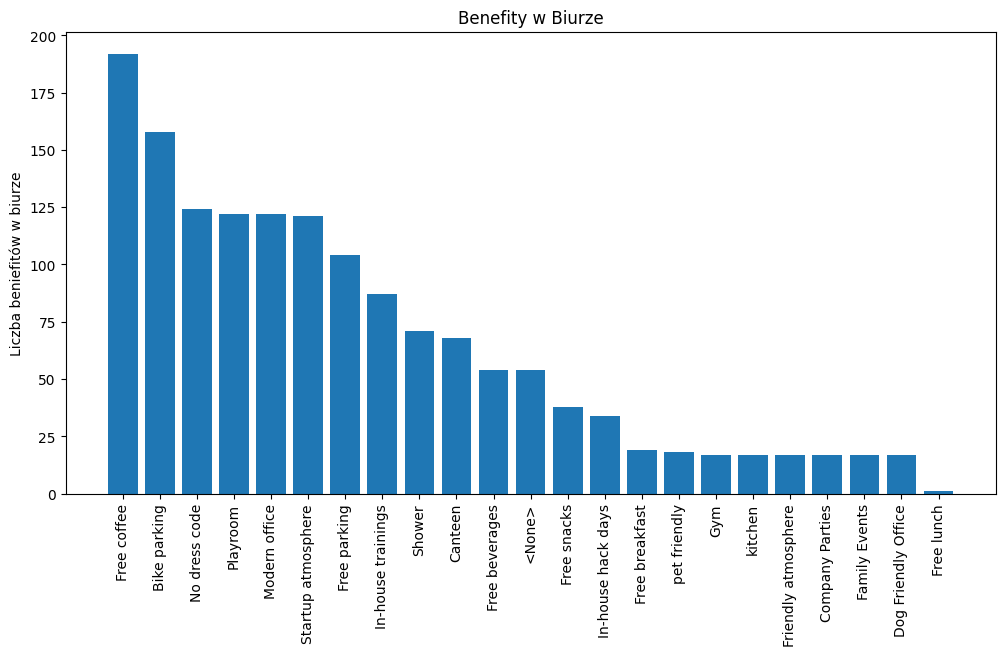

In [56]:

    def perks_ctr(df):
        counter = Counter()
        
        for loc in df['perks_in_the_office']:
            for sub_loc in loc.split(", "):
                counter[sub_loc] += 1

        # Sortuj dane w malejącej kolejności
        sorted_data = dict(sorted(counter.items(), key=lambda x: x[1], reverse=True))
        
        # Tworzenie wykresu
        plt.figure(figsize=(12, 6))
        plt.bar(sorted_data.keys(), sorted_data.values())
        plt.xticks(rotation=90)
        plt.ylabel('Liczba beniefitów w biurze')
        plt.title('Benefity w Biurze')
        plt.show()

# Możesz teraz użyć funkcji location_joining, przekazując jej df jako argument
# df = location_joining(df)

perks_ctr(df)

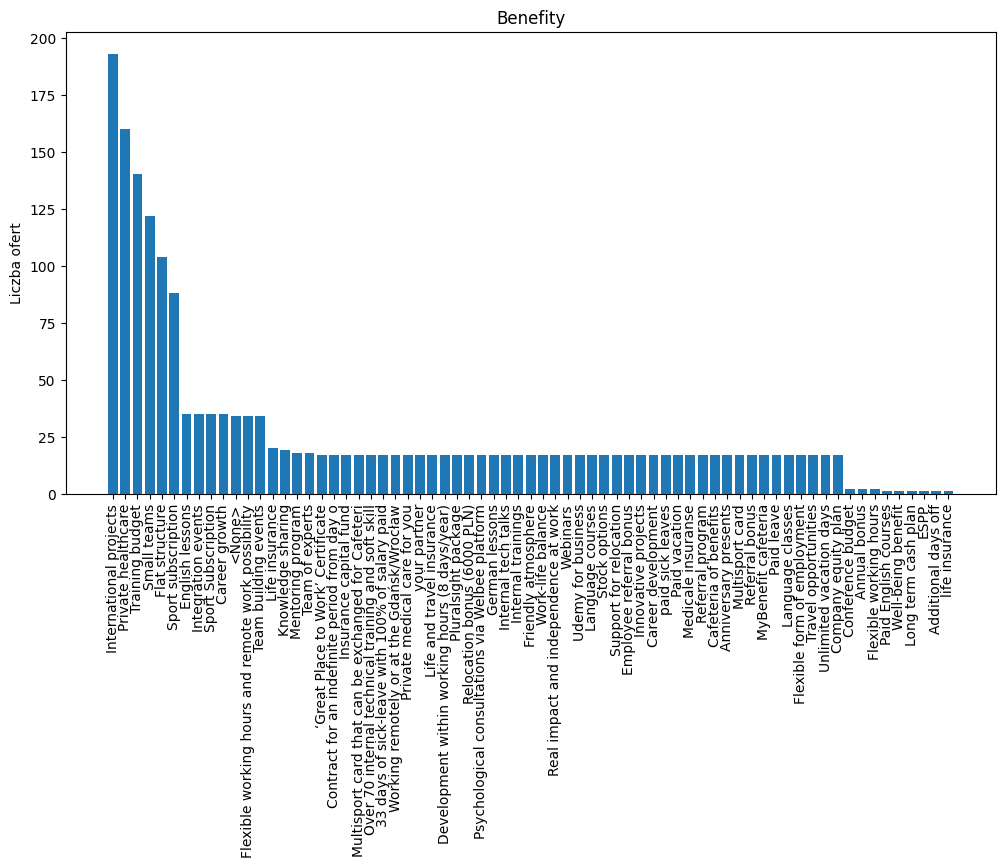

In [57]:

    def benefits_ctr(df):
        counter = Counter()
        
        for loc in df['benefits']:
            for sub_loc in loc.split(", "):
                counter[sub_loc] += 1

        # Sortuj dane w malejącej kolejności
        sorted_data = dict(sorted(counter.items(), key=lambda x: x[1], reverse=True))
        
        # Tworzenie wykresu
        plt.figure(figsize=(12, 6))
        plt.bar(sorted_data.keys(), sorted_data.values())
        plt.xticks(rotation=90)
        plt.ylabel('Liczba ofert')
        plt.title('Benefity')
        plt.show()

# Możesz teraz użyć funkcji location_joining, przekazując jej df jako argument
# df = location_joining(df)

benefits_ctr(df)

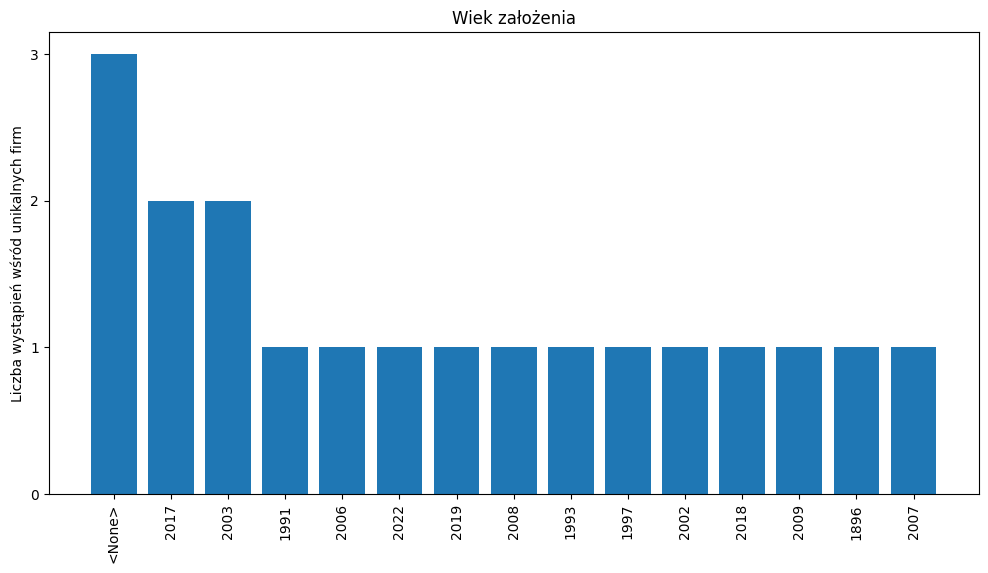

In [58]:
def unique_company_age_ctr(df):
    counter = Counter()
    once_mentioned = set()
    
    for index, row in df.iterrows():
        company = row['company']
        founded_in = row['company_info_founded_in']
        
        if company not in once_mentioned:
            counter[founded_in] += 1
            once_mentioned.add(company)
            
    # Sortuj dane w malejącej kolejności
    sorted_data = dict(sorted(counter.items(), key=lambda x: x[1], reverse=True))

    plt.figure(figsize=(12, 6))
    
    # Tworzenie wykresu
    bars = plt.bar(sorted_data.keys(), sorted_data.values())
    
    # Ustawienie oznaczeń na osi X dla wszystkich wartości
    plt.xticks(rotation=90)
    
    plt.ylabel('Liczba wystąpień wśród unikalnych firm')
    plt.title('Wiek założenia')
    
    # Ustawienie formatu osi Y, aby wyświetlać tylko liczby całkowite
    ax = plt.gca()
    ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

    # for bar, label in zip(bars, sorted_data.keys()):
    #     # if np.isfinite(float(label)):  # Sprawdzenie, czy wartość jest skończona
    #     plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, label, ha='center', va='bottom', rotation=45, fontsize=8)


    
    plt.show()

# Zakładam, że masz już wcześniej zdefiniowane df
unique_company_age_ctr(df)




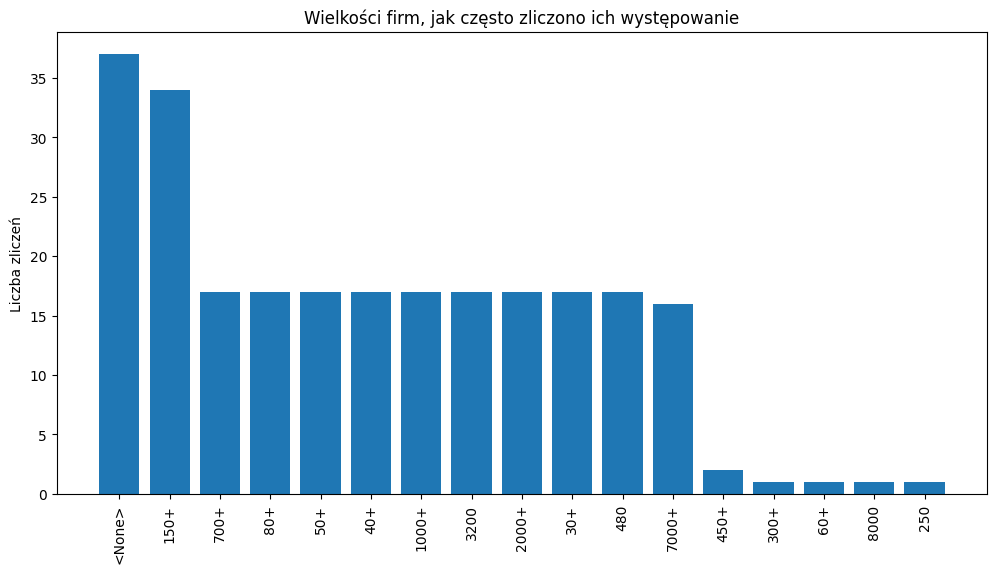

In [59]:

def string_only_size_ctr(df):
    counter = Counter()
    
    for loc in df['company_info_company_size']:
        if isinstance(loc, str):  # Tylko jeśli wartość to łańcuch znaków
            counter[loc] += 1

    # Sortuj dane według klucza
    sorted_data = dict(sorted(counter.items(), key=lambda x: x[1], reverse=True))
    
    # Tworzenie wykresu
    plt.figure(figsize=(12, 6))
    plt.bar(sorted_data.keys(), sorted_data.values())
    plt.xticks(rotation=90)
    plt.ylabel('Liczba zliczeń')
    plt.title('Wielkości firm, jak często zliczono ich występowanie')
    plt.show()

# Wywołanie zmodyfikowanej funkcji
string_only_size_ctr(df)


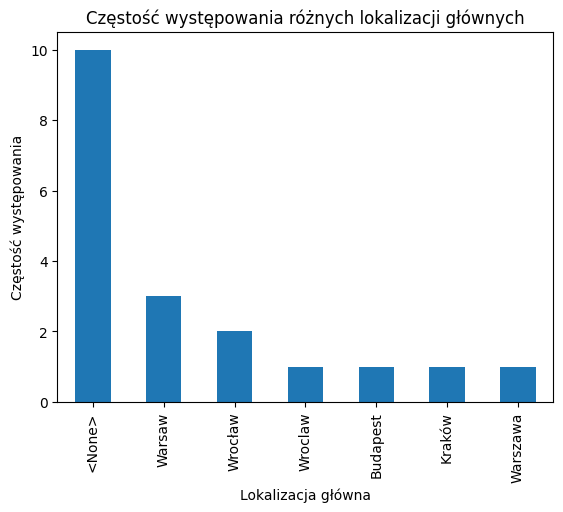

In [60]:
# Krok 1 & 2: Znajdź pierwszy wiersz dla każdej unikatowej wartości w kolumnie "company"
first_occurrences = df.drop_duplicates(subset='company')

# Krok 3 & 4: Zlicz częstość występowania różnych wartości w "company_info_main_location"
location_counts = first_occurrences['company_info_main_location'].value_counts()

# Krok 5: Stwórz wykres
location_counts.plot(kind='bar')
plt.ylabel('Częstość występowania')
plt.xlabel('Lokalizacja główna')
plt.title('Częstość występowania różnych lokalizacji głównych')
plt.show()

In [61]:
from datetime import timedelta

def analyze_when_published(row):
    if 'today' in row['when_published_relatively']:
        row['date_of_issueing_no'] = '0'
    else:
        # Wyszukuje najdłuższy ciąg cyfr w tekście
        digits = max(''.join(filter(str.isdigit, word)) for word in row['when_published_relatively'].split())
        row['date_of_issueing_no'] = digits
    return row

# Stosowanie funkcji do każdego wiersza i tworzenie kolumny 'date_of_issueing_no'
df = df.apply(analyze_when_published, axis=1)

# Utworzenie kolumny 'date_of_issueing', dodając 'date_of_issueing_no' dni do 'date_of_scrapping'
df['date_of_issueing'] = pd.to_datetime(df['date_of_scrapping']) - df['date_of_issueing_no'].astype(int).apply(lambda x: timedelta(days=x))

# Wyświetlenie wybranych kolumn
result_df = df[['id', 'date_of_scrapping', 'when_published_relatively', 'date_of_issueing', 'date_of_issueing_no']]
pd.set_option('display.max_rows', 30)
result_df

,id,date_of_scrapping,when_published_relatively,date_of_issueing,date_of_issueing_no
0,1,2023-09-27,today,2023-09-27,0
1,2,2023-09-27,1 day ago,2023-09-26,1
2,3,2023-09-27,1 day ago,2023-09-26,1
3,4,2023-09-27,1 day ago,2023-09-26,1
4,5,2023-09-27,1 day ago,2023-09-26,1
...,...,...,...,...,...
241,242,2023-09-27,1 day ago,2023-09-26,1
242,243,2023-09-27,1 day ago,2023-09-26,1
243,244,2023-09-27,1 day ago,2023-09-26,1
244,245,2023-09-27,today,2023-09-27,0


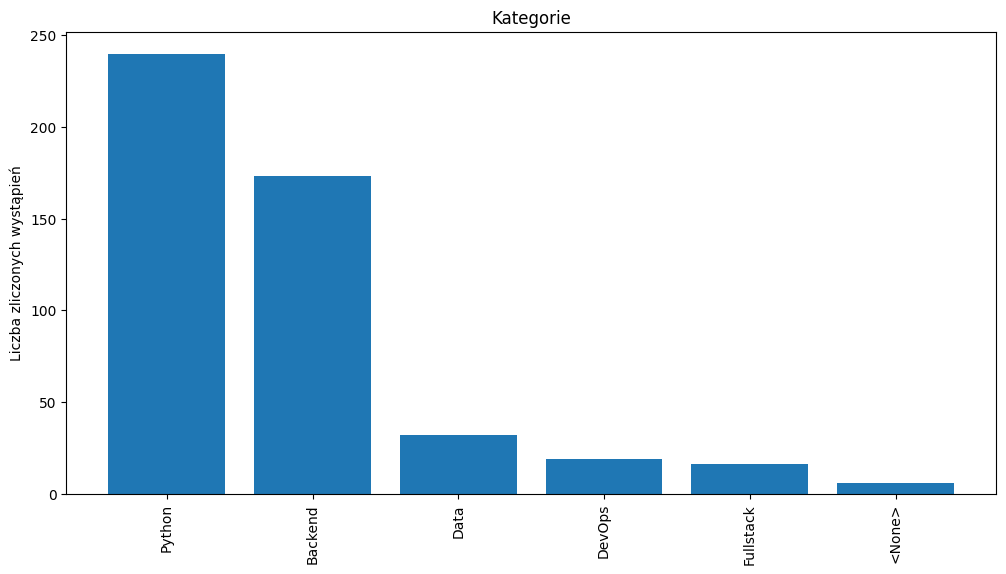

In [62]:

    def categories_ctr(df):
        counter = Counter()
        
        for loc in df['categories']:
            for sub_loc in loc.split(", "):
                counter[sub_loc] += 1

        # Sortuj dane w malejącej kolejności
        sorted_data = dict(sorted(counter.items(), key=lambda x: x[1], reverse=True))
                    
        # Tworzenie wykresu
        plt.figure(figsize=(12, 6))
        plt.bar(sorted_data.keys(), sorted_data.values())
        plt.xticks(rotation=90)
        plt.ylabel('Liczba zliczonych wystąpień')
        plt.title('Kategorie')
        plt.show()

# Możesz teraz użyć funkcji location_joining, przekazując jej df jako argument
# df = location_joining(df)

categories_ctr(df)

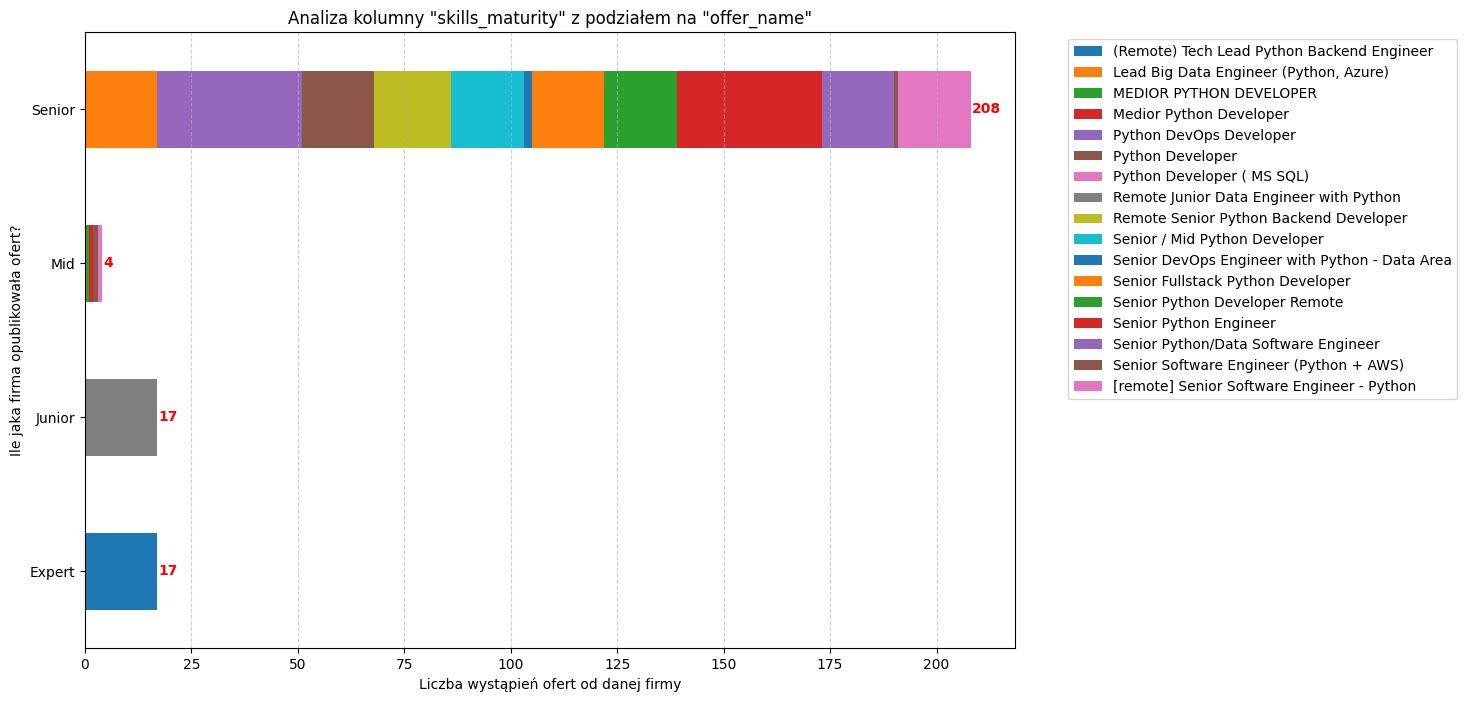

In [63]:

def analyze_skills_maturity_with_offer_names(dataframe, column_name="skills_maturity", offer_column_name="offer_name"):
    # Sprawdź, czy kolumna istnieje w ramce danych
    if column_name not in dataframe.columns:
        print(f'Kolumna "{column_name}" nie istnieje w ramce danych.')
        return

    # Sprawdź, czy kolumna z nazwami ofert istnieje w ramce danych
    if offer_column_name not in dataframe.columns:
        print(f'Kolumna "{offer_column_name}" nie istnieje w ramce danych.')
        return

    # Grupowanie danych według kolumny i kolumny z nazwami ofert, a następnie zliczanie wielkości każdej grupy
    grouped_data = dataframe.groupby([column_name, offer_column_name]).size().unstack(fill_value=0)

    # Obliczenie łącznej liczby ofert dla każdej firmy
    total_offers = grouped_data.sum(axis=1)

    # Tworzenie wizualizacji
    plt.figure(figsize=(12, 8))  # Ustawienie rozmiaru wykresu
    ax = plt.gca()  # Pobranie obecnej osi (get current axis)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # Ustawienie lokalizatora głównych znaczników osi X, aby używał tylko liczb całkowitych

    # Rysowanie poziomego wykresu słupkowego z podgrupami
    grouped_data.plot(kind='barh', stacked=True, ax=ax)
    
    # Dodanie łącznej liczby ofert jako tekst na wykresie
    for i, total in enumerate(total_offers):
        plt.text(total + grouped_data.max().max() * 0.01, i, str(total), va='center', color='red', fontweight='bold', fontsize=10)
    
    plt.ylabel('Ile jaka firma opublikowała ofert?')
    plt.xlabel('Liczba wystąpień ofert od danej firmy')
    plt.title(f'Analiza kolumny "{column_name}" z podziałem na "{offer_column_name}"')
    plt.grid(axis='x', linestyle='--', alpha=0.6)  # Zmiana osi siatki na 'x'

    # Przeniesienie legendy poza obszar wykresu
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()


analyze_skills_maturity_with_offer_names(df, 'skills_maturity', 'offer_name')


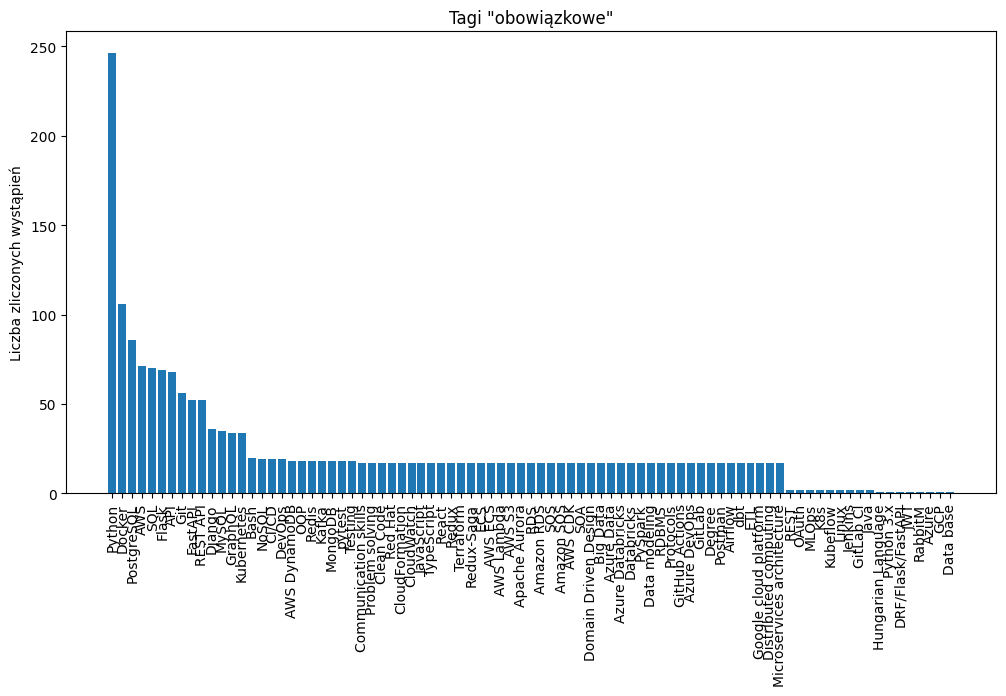

In [64]:

    def tags_mandatory_ctr(df):
        counter = Counter()
        
        for loc in df['tags_mandatory']:
            for sub_loc in loc.split(", "):
                counter[sub_loc] += 1

         # Sortuj dane w malejącej kolejności
        sorted_data = dict(sorted(counter.items(), key=lambda x: x[1], reverse=True))
                    
        # Tworzenie wykresu
        plt.figure(figsize=(12, 6))
        plt.bar(sorted_data.keys(), sorted_data.values())
        plt.xticks(rotation=90)
        plt.ylabel('Liczba zliczonych wystąpień')
        plt.title('Tagi "obowiązkowe"')
        plt.show()



tags_mandatory_ctr(df)

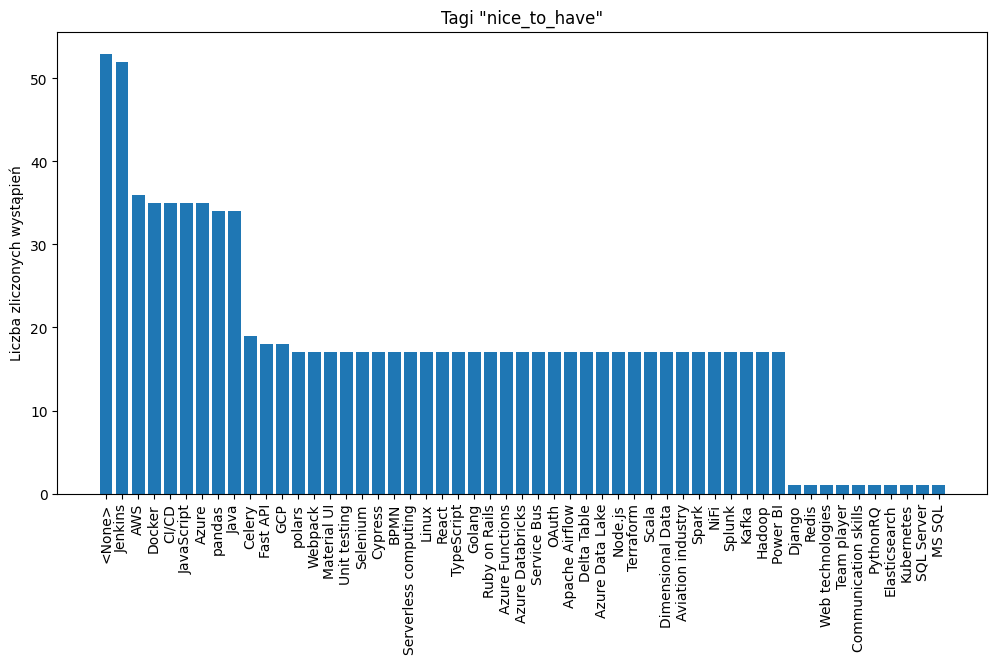

In [65]:

    def tags_nice_to_have_ctr(df):
        counter = Counter()
        
        for loc in df['tags_nice_to_have']:
            for sub_loc in loc.split(", "):
                counter[sub_loc] += 1

         # Sortuj dane w malejącej kolejności
        sorted_data = dict(sorted(counter.items(), key=lambda x: x[1], reverse=True))
                    
        # Tworzenie wykresu
        plt.figure(figsize=(12, 6))
        plt.bar(sorted_data.keys(), sorted_data.values())
        plt.xticks(rotation=90)
        plt.ylabel('Liczba zliczonych wystąpień')
        plt.title('Tagi "nice_to_have"')
        plt.show()



tags_nice_to_have_ctr(df)